<a href="https://colab.research.google.com/github/likeaAI/pytorch/blob/main/Faster_R_CNN_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# The full blood cell detection dataset 
# 목표 faster-rcnn 코드 구현 및 json 좌표 cocoformat으로 변환 

In [1]:
!git clone https://github.com/Shenggan/BCCD_Dataset.git

Cloning into 'BCCD_Dataset'...
remote: Enumerating objects: 800, done.
remote: Total 800 (delta 0), reused 0 (delta 0), pack-reused 800
Receiving objects: 100% (800/800), 7.39 MiB | 4.86 MiB/s, done.
Resolving deltas: 100% (378/378), done.


In [31]:
### 수정 중 requirement.txt 파일 만들것 
'h5py', 'tensorflow', 'Keras==2.0.3', 'numpy', 'opencv-python', 'sklearn'

['h5py', 'tensorflow', 'Keras==2.0.3', 'numpy', 'opencv-python', 'sklearn']
<class 'NoneType'>


In [15]:
pip install -r requirement.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 196 kB 8.4 MB/s 
     |████████████████████████████████| 2.8 MB 56.0 MB/s 
     |████████████████████████████████| 511.7 MB 5.5 kB/s 
     |████████████████████████████████| 438 kB 53.8 MB/s 
     |████████████████████████████████| 5.8 MB 49.9 MB/s 
     |████████████████████████████████| 511.7 MB 4.1 kB/s 
     - 668.6 MB 92.1 MB/s
     |████████████████████████████████| 497.9 MB 16 kB/s 
     / 668.6 MB 282 kB/s
     / 668.6 MB 27.3 MB/s
     |████████████████████████████████| 497.9 MB 18 kB/s 
     / 668.3 MB 2.7 MB/s
     |████████████████████████████████| 497.5 MB 23 kB/s 
     | 671.4 MB 235 kB/s
     |████████████████████████████████| 495.4 MB 24 kB/s 
     \ 671.4 MB 88.9 MB/s
     |████████████████████████████████| 495.4 MB 32 kB/s 
     |████████████████████████████████| 495.0 MB 31 kB/s 
     \ 665.5 MB 387 kB/s
     |█████████           

In [17]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches

In [21]:
# read the csv file using read_csv function of pandas
train = pd.read_csv('/content/BCCD_Dataset/test.csv')
train.head()

,filename,cell_type,xmin,xmax,ymin,ymax
0,BloodImage_00000.jpg,WBC,260,491,177,376
1,BloodImage_00000.jpg,RBC,78,184,336,435
2,BloodImage_00000.jpg,RBC,63,169,237,336
3,BloodImage_00000.jpg,RBC,214,320,362,461
4,BloodImage_00000.jpg,RBC,414,506,352,445


In [ ]:
# 샘플이미지 라벨 확인해보기 

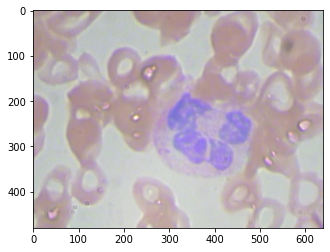

In [33]:
# reading single image using imread function of matplotlib
image = plt.imread('/content/BCCD_Dataset/BCCD/JPEGImages/BloodImage_00000.jpg')
plt.imshow(image)

In [ ]:
fig = plt.figure()

#add axes to the image
ax = fig.add_axes([0,0,1,1])

# read and plot the image
image = plt.imread('images/BloodImage_00000.jpg	.jpg')
plt.imshow(image)

# iterating over the image for different objects
for _,row in train[train.image_names == "BloodImage_00000.jpg	.jpg"].iterrows():
    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax
    
    width = xmax - xmin
    height = ymax - ymin
    
    # assign different color to different classes of objects
    if row.cell_type == 'RBC':
        edgecolor = 'r'
        ax.annotate('RBC', xy=(xmax-40,ymin+20))
    elif row.cell_type == 'WBC':
        edgecolor = 'b'
        ax.annotate('WBC', xy=(xmax-40,ymin+20))
    elif row.cell_type == 'Platelets':
        edgecolor = 'g'
        ax.annotate('Platelets', xy=(xmax-40,ymin+20))
        
    # add bounding boxes to the image
    rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = edgecolor, facecolor = 'none')
    
    ax.add_patch(rect)

In [ ]:
'''
There are 6 columns in the train file. Let’s understand what each column represents:

image_names: contains the name of the image
cell_type: denotes the type of the cell
xmin: x-coordinate of the bottom left part of the image
xmax: x-coordinate of the top right part of the image
ymin: y-coordinate of the bottom left part of the image
ymax: y-coordinate of the top right part of the image
'''